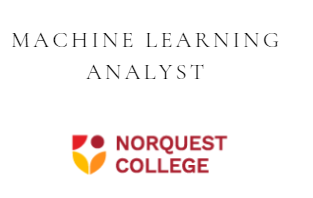

### Assignment: Machine Learning Model Training and Evaluation

**Objective:**  
In this assignment, you will use the **Machine Learning notebook** from last year's project as a starting point. Your goal is to retrain the model using the **2023 Food Drive data** for training and then use the **2024 Food Drive data** as the test set to evaluate the model’s accuracy and effectiveness. You will compare the predictions with the actual results from 2024 and assess the model's performance.

---

### Steps:

1. **Review the ML Notebook**
   - Start by reviewing the Machine Learning notebook provided from last year. Understand the model architecture, feature selection, and data preprocessing steps.
   - Ensure you understand the model’s objective and how predictions were generated for donation volumes, volunteer allocation, or other key metrics.

2. **Data Preparation**
   - **Load the 2023 data** as the training dataset and ensure that the data is cleaned and preprocessed in a way that matches last year's model requirements (feature scaling, missing value handling, etc.).
   - **Load the 2024 data** as the test dataset. Make sure that the test dataset is structured in the same format as the training data, ensuring consistency in features.

3. **Model Training**
   - Using the 2023 data, retrain the model provided in the notebook. Ensure that the parameters, features, and settings used in last year’s notebook are maintained unless you choose to optimize them.
   - Record the model's **training performance metrics**, such as accuracy, loss, or other relevant evaluation metrics based on your model (e.g., RMSE, MAE, precision).

4. **Model Testing**
   - Once the model is trained, use the 2024 data as the **test set**.
   - Generate predictions using the model and compare them to the actual results from the 2024 food drive.
   - Record the model’s **test performance metrics** and compare them to the training metrics.

5. **Accuracy and Performance Analysis**
   - Evaluate the **accuracy** of the model's predictions by comparing them to the actual outcomes from the 2024 data.
   - Use relevant evaluation metrics (e.g., accuracy, precision, recall, F1 score, MAE, RMSE, etc.) to measure the model's performance.
   - Identify **any discrepancies** between the predictions and actual outcomes. Are there any trends or patterns where the model performed well or poorly?





# Load data and run previous EDA

# Modelling

Predicting the **number of donation bags collected** is a regression problem, and there are several regression models you can use in addition to Linear Regression. Here are some commonly used regression models:

Ridge Regression and Lasso Regression: These are extensions of Linear Regression that add regularization to the model to prevent overfitting. Ridge regression uses L2 regularization, and Lasso regression uses L1 regularization.

Support Vector Regression (SVR): SVR is a regression technique that extends Support Vector Machines (SVM) to regression problems. It is particularly useful when dealing with non-linear relationships.

ElasticNet Regression: ElasticNet combines L1 and L2 regularization, offering a balance between Ridge and Lasso regression. It can handle cases where some features are irrelevant or redundant.

Polynomial Regression: Polynomial regression allows you to capture non-linear relationships by introducing polynomial features. It's suitable when the relationship between the input features and the target variable is curvilinear.

Random Forest Regression: Random Forest can also be used for regression tasks. It combines multiple decision trees to provide robust predictions.

Gradient Boosting Regressors: Algorithms like XGBoost, LightGBM, and CatBoost have regression variants. They are powerful and often provide state-of-the-art performance for regression tasks.

K-Nearest Neighbors (KNN) Regression: KNN can be adapted for regression by predicting the target variable as the average or weighted average of the K nearest neighbors' target values.

Neural Networks (Deep Learning): You can use deep learning models, such as feedforward neural networks, to perform regression tasks. Neural networks can capture complex relationships in the data.

Gaussian Process Regression: Gaussian process regression is a probabilistic approach that models the target variable as a distribution, providing uncertainty estimates along with predictions.

Decision Tree Regression: Decision trees can be used for regression as well as classification. They partition the data and predict the target variable as the average of the target values in each leaf node.

Bayesian Regression: Bayesian regression models incorporate Bayesian techniques to estimate model parameters and provide uncertainty estimates in predictions.

# Solution 1: Donation Prediction


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


data_2023 = pd.read_csv("cleaned_data_2023.csv")
data_2024 = pd.read_csv("cleaned_data_2024.csv")
X = data_2023[['Completed More Than One Route','Routes Completed','Time Spent', '# of Adult Volunteers','Doors in Route', '# of Youth Volunteers', 'Time Spent']]
y = data_2023['Donation Bags Collected']

In [ ]:
# Display column names to understand differences
print("Columns in 2023 data:", data_2023.columns.tolist())
print("Columns in 2024 data:", data_2024.columns.tolist())

Columns in 2023 data: ['Date', 'Location', 'Stake', '# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected', 'Completed More Than One Route', 'Ward/Branch', 'Comments', 'Routes Completed', 'Doors in Route', 'time completed', 'Time Spent']
Columns in 2024 data: ['How did you receive the form?', 'Drop Off Location', 'Stake', 'Route Number/Name', 'Time to Complete (min)', 'No of Adult Volunteers', 'No of Youth Volunteers', 'Doors in Route', 'Donation Bags Collected', 'Completed More Than One Route', 'How many routes did you complete?', 'Additional Routes completed (2 routes)', 'Additional routes completed (3 routes)', 'Additional routes completed (3 routes)2', 'Additional routes completed (More than 3 Routes)', 'Additional routes completed (More than 3 Routes)2', 'Additional routes completed (More than 3 Routes)3', 'Comments or Feedback', 'Ward']


In [ ]:
# Standardize column names across both datasets to align features with the 2023 dataset's naming convention
rename_2024 = {
    'No of Adult Volunteers': '# of Adult Volunteers',
    'No of Youth Volunteers': '# of Youth Volunteers',
    'Time to Complete (min)': 'Time Spent',
    'How many routes did you complete?': 'Routes Completed'
}

data_2024.rename(columns=rename_2024, inplace=True)
X2 = data_2024[['Completed More Than One Route','Routes Completed','Time Spent', '# of Adult Volunteers','Doors in Route', '# of Youth Volunteers', 'Time Spent']]
y2 = data_2024['Donation Bags Collected']

In [ ]:
# Define function to convert numeric time spent to range labels for 2023 data
def convert_to_range(value):
    if value <= 30:
        return "0 - 30 Minutes"
    elif 30 < value <= 60:
        return "30 - 60 Minutes"
    elif 60 < value <= 90:
        return "1 Hour - 1.5 Hours"
    else:
        return "2+ Hours"

# Apply the function to convert 'Time Spent' in the 2023 dataset
data_2023['Time Spent'] = data_2023['Time Spent'].apply(convert_to_range)

# Verify change in 2023 data
print("Updated 'Time Spent' in 2023 data:\n", data_2023['Time Spent'].head())

# Ensuring 2024 data 'Time Spent' is also in the same range format (already mapped as per previous steps)
# Display sample to confirm consistency
print("Updated 'Time Spent' in 2024 data:\n", data_2024['Time Spent'].head())

Updated 'Time Spent' in 2023 data:
 0    0 - 30 Minutes
1    0 - 30 Minutes
2    0 - 30 Minutes
3    0 - 30 Minutes
4    0 - 30 Minutes
Name: Time Spent, dtype: object
Updated 'Time Spent' in 2024 data:
 0     0 - 30 Minutes
1     0 - 30 Minutes
2     0 - 30 Minutes
3     0 - 30 Minutes
4    30 - 60 Minutes
Name: Time Spent, dtype: object


In [ ]:
data_2023.head()

,Date,Location,Stake,# of Adult Volunteers,# of Youth Volunteers,Donation Bags Collected,Completed More Than One Route,Ward/Branch,Comments,Routes Completed,Doors in Route,time completed,Time Spent
0,2023-09-23 10:36:10,Londonderry Chapel,Bonnie Doon Stake,1,3,14,0,Clareview Ward,NaN,2,14,25.0,0 - 30 Minutes
1,2023-09-23 10:36:52,Gateway Stake Centre,Gateway Stake,3,1,18,1,Crawford Plains Ward,NaN,2,144,30.0,0 - 30 Minutes
2,2023-09-23 10:40:22,Gateway Stake Centre,Gateway Stake,2,0,20,0,Silver Berry Ward,NaN,2,186,30.0,0 - 30 Minutes
3,2023-09-23 10:41:08,Gateway Stake Centre,Gateway Stake,2,0,20,1,Crawford Plains Ward,NaN,1,194,30.0,0 - 30 Minutes
4,2023-09-23 10:44:10,Londonderry Chapel,Bonnie Doon Stake,1,0,2,0,Londonderry Ward,NaN,2,1,10.0,0 - 30 Minutes


In [ ]:
data_2023.tail()

,Date,Location,Stake,# of Adult Volunteers,# of Youth Volunteers,Donation Bags Collected,Completed More Than One Route,Ward/Branch,Comments,Routes Completed,Doors in Route,time completed,Time Spent
449,2023-09-27 14:24:33,North Stake Centre,Edmonton North Stake,2,0,20,0,Namao Ward,NaN,2,150,45.0,30 - 60 Minutes
450,2023-09-27 14:24:35,North Stake Centre,Edmonton North Stake,2,0,20,0,Namao Ward,NaN,2,150,45.0,30 - 60 Minutes
451,2023-09-28 20:44:23,Parkland (Spruce Grove/Stony Plain),Edmonton North Stake,2,4,51,1,Stony Plain Ward,NaN,2,194,120.0,2+ Hours
452,2023-10-15 11:15:43,North Stake Centre,Edmonton North Stake,3,0,78,1,Griesbach Ward,NaN,3,600,150.0,2+ Hours
453,NaN,Londonderry Chapel,Edmonton North Stake,2,2,5,0,Lago Lindo Branch,NaN,2,194,NaN,0 - 30 Minutes


In [ ]:
data_2024.head()

,How did you receive the form?,Drop Off Location,Stake,Route Number/Name,Time Spent,# of Adult Volunteers,# of Youth Volunteers,Doors in Route,Donation Bags Collected,Completed More Than One Route,Routes Completed,Additional Routes completed (2 routes),Additional routes completed (3 routes),Additional routes completed (3 routes)2,Additional routes completed (More than 3 Routes),Additional routes completed (More than 3 Routes)2,Additional routes completed (More than 3 Routes)3,Comments or Feedback,Ward
0,In person,Bearspaw Chapel,Riverbend Stake,676,0 - 30 Minutes,7,7,78,59,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woodbend Ward
1,In person,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clareview Ward
2,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward
3,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forest Heights Ward
4,In person,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,2,2,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward


In [ ]:
# Encoding 'Completed More Than One Route' to be binary (1 for Yes, 0 for No) in the 2024 dataset
data_2024['Completed More Than One Route'] = data_2024['Completed More Than One Route'].map({'Yes': 1, 'No': 0})

# Verify 'Completed More Than One Route' column consistency in both datasets
print("Unique values in 2023 'Completed More Than One Route':", data_2023['Completed More Than One Route'].unique())
print("Unique values in 2024 'Completed More Than One Route':", data_2024['Completed More Than One Route'].unique())

Unique values in 2023 'Completed More Than One Route': [0 1]
Unique values in 2024 'Completed More Than One Route': [0 1]


In [ ]:
print("Unique values in 2023 ", data_2023['Time Spent'].unique())
print("Unique values in 2024 ", data_2024['Time Spent'].unique())

Unique values in 2023  ['0 - 30 Minutes' '30 - 60 Minutes' '1 Hour - 1.5 Hours' '2+ Hours']
Unique values in 2024  ['0 - 30 Minutes' '30 - 60 Minutes' '1 Hour - 1.5 Hours' '2+ Hours']


In [ ]:
# Convert 'Routes Completed' to numeric equivalents
# Assuming 'More than 3' should be treated as 4 for modeling purposes
route_mapping = {
    '1': 1,
    '2': 2,
    '3': 3,
    'More than 3': 4
}
data_2023['Routes Completed'] = data_2023['Routes Completed'].map(route_mapping)
data_2024['Routes Completed'] = data_2024['Routes Completed'].map(route_mapping)


In [ ]:
# Encoding 'Time Spent' categorical ranges into numerical values for both datasets
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_2023['Time Spent'] = encoder.fit_transform(data_2023['Time Spent'])
data_2024['Time Spent'] = encoder.transform(data_2024['Time Spent'])  # Ensuring consistency with 2023 encoding



In [ ]:
# Define features and target
selected_columns = [
    'Completed More Than One Route', 'Time Spent',
    '# of Adult Volunteers', 'Doors in Route', '# of Youth Volunteers'
]
X_train = data_2023[selected_columns]
y_train = data_2023['Donation Bags Collected']

X_test = data_2024[selected_columns]
y_test = data_2024['Donation Bags Collected']



In [ ]:
print("Missing values in X_train:\n", X_train.isnull().sum())
print("Missing values in X_test:\n", X_test.isnull().sum())

Missing values in X_train:
 Completed More Than One Route    0
Time Spent                       0
# of Adult Volunteers            0
Doors in Route                   0
# of Youth Volunteers            0
dtype: int64
Missing values in X_test:
 Completed More Than One Route    0
Time Spent                       0
# of Adult Volunteers            0
Doors in Route                   0
# of Youth Volunteers            0
dtype: int64


In [ ]:
# Model Training: Linear Regression as a baseline
model = LinearRegression()
model.fit(X_train, y_train)

# Generate Predictions on 2024 Test Data
y_pred = model.predict(X_test)



In [ ]:
# Model Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the Evaluation Results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 14.604353052517244
R-squared (R2): 0.12102438557431117


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Fit a regression model to predict the number of donation bags

data_combined = pd.concat([data_2023, data_2024], ignore_index=True)

# Define features (X) and target (y)
X = data_combined[['Completed More Than One Route', 'Time Spent',
                   '# of Adult Volunteers', 'Doors in Route', '# of Youth Volunteers']]
y = data_combined['Donation Bags Collected']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Display actual vs predicted values
predictions_df = pd.DataFrame({
    'Actual Donation Bags': y_test,
    'Predicted Donation Bags': y_pred
})
print(predictions_df.head())


Mean Absolute Error (MAE): 15.853377413964813
R-squared (R2): 0.12347218041029817
     Actual Donation Bags  Predicted Donation Bags
70                     21                52.768324
235                    14                29.346237
430                    14                17.207740
412                    32                25.560861
39                     29                23.749620


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1792.0560302814026


# Compare with other Regressor Models

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

# Standardize features (required for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Implement Decision Tree Regression
decision_tree = DecisionTreeRegressor(max_depth=5)  # You can adjust the maximum depth
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implement K-Nearest Neighbors (KNN) Regression
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Implement Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=100)  # You can adjust the number of trees (n_estimators)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

# Implement Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)  # You can adjust hyperparameters
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_test)

In [ ]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared (R²): {r2}\n")




In [ ]:
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")
evaluate_model(y_test, y_pred_gradient_boosting, "Gradient Boosting")

Decision Tree - Mean Squared Error: 1873.8341997339319
Decision Tree - R-squared (R²): 0.083472961999138

K-Nearest Neighbors (KNN) - Mean Squared Error: 1934.742762430939
K-Nearest Neighbors (KNN) - R-squared (R²): 0.053681455063516736

Random Forest - Mean Squared Error: 2875.8019057354823
Random Forest - R-squared (R²): -0.406608014153669

Gradient Boosting - Mean Squared Error: 2998.150275816187
Gradient Boosting - R-squared (R²): -0.4664508696476206



*Which model performed best?*

the Decision Tree model is the best performer among these options based on both MSE and R². However, the overall low R² values across models suggest that feature engineering or alternative models may be needed to improve accuracy further.

# Save the best performing model

In [ ]:
!pip install joblib


In [ ]:
import joblib

# Assuming 'random_forest' is your best trained Random Forest Regressor model
model = decision_tree  # Replace with your actual model

# Specify the file path where you want to save the model
model_filename = 'decision_tree_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)


['decision_tree_model.pkl']

# Determine Feature Imporance- Regression Models

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'decision_tree' is your trained Decision Tree Regressor model
feature_importance = decision_tree.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Regressor Feature Importance')
plt.show()


In [ ]:

# Assuming 'random_forest' is your trained Random Forest Regressor model
feature_importance = random_forest.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regressor Feature Importance')
plt.show()


In [ ]:

# Assuming 'gradient_boosting' is your trained Gradient Boosting Regressor model
feature_importance = gradient_boosting.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Regressor Feature Importance')
plt.show()


# Solution 2: Convert to a Classification Problem

To do this we can set a threshold for the number of bags collected to determine whether a donation drive is considered successful or not. This threshold can be used to convert your regression task (predicting the number of bags collected) into a classification task (predicting whether the threshold was met or not).

In [ ]:
# Combine datasets if needed and define the threshold for "successful" donation drives
threshold = 50  # In this case, 50 bags is the threshold for success
data_combined['Success'] = (data_combined['Donation Bags Collected'] >= threshold).astype(int)


# Check for Data imbalance

In [ ]:
import matplotlib.pyplot as plt


# Calculate value counts for the 'Success' column
success_counts = data_combined['Success'].value_counts()




In [ ]:
# Plotting the bar plot
plt.figure(figsize=(6, 4))
success_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Success Class Distribution')
plt.xlabel('Success (1) / Failure (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Consider reducing your threshold for better balance. Try #40, #30...etc

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Assuming the target variable is in a column named 'Success' (1 for success, 0 for failure)
# Define potential thresholds
thresholds = [50, 40, 30, 20]

# Iterate through each threshold and check the class balance
for threshold in thresholds:
    # Convert 'Donation Bags Collected' to binary target variable based on threshold
    data_combined['Success'] = (data_combined['Donation Bags Collected'] >= threshold).astype(int)

    # Plot class distribution for the current threshold
    success_counts = data_combined['Success'].value_counts()
    plt.figure(figsize=(6, 4))
    success_counts.plot(kind='bar', color=['green', 'red'])
    plt.title(f'Success Class Distribution (Threshold = {threshold} bags)')
    plt.xlabel('Success (1) / Failure (0)')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()


In [ ]:
# Choose the best threshold based on class balance (for this example, we assume 40 provides good balance)
final_threshold = 30
data_combined['Success'] = (data_combined['Donation Bags Collected'] >= final_threshold).astype(int)

# Define features (X) and the final binary target (y) for classification
X = data_combined[['Completed More Than One Route', 'Time Spent', '# of Adult Volunteers',
                   'Doors in Route', '# of Youth Volunteers']]
y = data_combined['Success']


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features (required for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compare Models

In [ ]:
# Implement K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Implement Decision Trees
decision_tree = DecisionTreeClassifier(max_depth=5)  # You can adjust the maximum depth
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Implement Random Forest
random_forest = RandomForestClassifier(n_estimators=100)  # You can adjust the number of trees (n_estimators)
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)



In [ ]:
# Evaluate the models
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random_forest))



In [ ]:
# Optionally, you can print more evaluation metrics like precision, recall, and F1-score
print("\nClassification Report for KNN:")
print(classification_report(y_test, y_pred_knn))



In [ ]:
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_decision_tree))



In [ ]:
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_random_forest))

*Which model performed best?*

The Decision Tree model is the best-performing model overall, with the highest accuracy (0.72) and generally better performance on key metrics like precision and recall.

# Save the best performing model

In [ ]:


# Assuming 'random_forest_classifier' is your best trained Random Forest Classifier model
model = decision_tree  # Replace with your actual model

# Specify the file path where you want to save the model
model_filename = 'decision_tree_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)


# Determine Feature Importance- Classification Models

Decision Tree

In [ ]:

# Assuming 'decision_tree' is your trained Decision Tree model
feature_importance = decision_tree.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()


Random Forest

In [ ]:

# Assuming 'random_forest' is your trained Random Forest model
feature_importance = random_forest.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


Gradient Boost

In [ ]:

# Assuming 'gradient_boosting' is your trained Gradient Boosting model
feature_importance = gradient_boosting.feature_importances_
feature_names = X.columns

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Feature Importance')
plt.show()


# Lab Assignment (Individual)

1. Predict time spent per Ward/Neighbourhood (2023)
2. Predict Time Spent per Ward?Neighbourhood & Route (2023 & 2024)
3. Create a Threshold and determine Routes that lasted more than 60 minutes to complete
4. Check for data imbalance in your label. What is Data imbalance? What steps can be taken to address Data imbalance.
5. Generate Evaluation reports

## **Predict time spent per Ward/Neighbourhood (2023)**

In [ ]:
data_2023.head()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report



def convert_to_range(value):
    if value <= 30:
        return "0 - 30 Minutes"
    elif 30 < value <= 60:
        return "30 - 60 Minutes"
    elif 60 < value <= 90:
        return "1 Hour - 1.5 Hours"
    else:
        return "2+ Hours"

# Apply the function to convert 'Time Spent' in the 2023 dataset
data_2023['Time Spent'] = data_2023['time completed'].apply(convert_to_range)

# Feature Engineering: Select relevant features
X = data_2023[['Ward/Branch']]
y = data_2023['Time Spent']

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


time_spent_2023_pred = model.predict(X)

# Output predictions
data_2023['Predicted_Time_Category'] = time_spent_2023_pred
print(data_2023[['Ward/Branch', 'Predicted_Time_Category']])


In [ ]:
data_2023.tail()

## **Predict Time Spent per Ward?Neighbourhood & Route (2023 & 2024)**

We dont have routes column unfortunately, it was dropped earlier for 2023

In [ ]:

# Add a 'Year' column to differentiate the data
data_2023['Year'] = 2023
data_2024['Year'] = 2024

# Concatenate 2023 and 2024 data for consistent preprocessing
data_combined = pd.concat([data_2023, data_2024], ignore_index=True)

# Ensure 'Time Spent' is categorized properly
def convert_to_range(value):
    if value <= 30:
        return "0 - 30 Minutes"
    elif 30 < value <= 60:
        return "30 - 60 Minutes"
    elif 60 < value <= 90:
        return "1 Hour - 1.5 Hours"
    else:
        return "2+ Hours"

# Apply categorization to the 'time completed' column
data_combined['Time Spent'] = data_combined['time completed'].apply(convert_to_range)

# Feature Engineering: Select relevant features
X = data_combined[['Ward/Branch', 'Year']]  # Include 'Year' as a feature if needed
y = data_combined['Time Spent']

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split data: use only 2023 data for training, predict for both 2023 and 2024
X_train = X[data_combined['Year'] == 2023]
y_train = y[data_combined['Year'] == 2023]
X_test_2023 = X[data_combined['Year'] == 2023]
X_test_2024 = X[data_combined['Year'] == 2024]

# Model Training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction for 2023 data
y_pred_2023 = model.predict(X_test_2023)

# Prediction for 2024 data
y_pred_2024 = model.predict(X_test_2024)

# Evaluation on 2023 data to validate model performance
accuracy = accuracy_score(y_train, y_pred_2023)
report = classification_report(y_train, y_pred_2023)

print("Accuracy on 2023 data:", accuracy)
print("Classification Report for 2023 data:\n", report)

# Output predictions for both 2023 and 2024 data
data_combined.loc[data_combined['Year'] == 2023, 'Predicted_Time_Category'] = y_pred_2023
data_combined.loc[data_combined['Year'] == 2024, 'Predicted_Time_Category'] = y_pred_2024

# View predictions
print(data_combined[['Ward/Branch', 'Year', 'Predicted_Time_Category']])


# Create a Threshold and determine Routes that lasted more than 60 minutes to complete

In [ ]:
data_2024.head()

In [ ]:
def convert_to_range(value):
    if value == 0:
        return "0 - 30 Minutes"
    elif  value == 1:
        return "30 - 60 Minutes"
    elif value == 2:
        return "1 Hour - 1.5 Hours"
    else:
        return "2+ Hours"

# Apply categorization to the 'time completed' column
data_2024['Time Completed'] = data_2024['Time Spent'].apply(convert_to_range)

In [ ]:
data_2024.head()

In [ ]:
import pandas as pd

import pandas as pd


# Create a threshold column to identify routes lasting more than 60 minutes
data_2024['Over_60_Minutes'] = data_2024['Time Completed'].apply(lambda x: 'Yes' if x in ('1 Hour - 1.5 Hours', '2+ Hours') else 'No')

# Filter out routes that took more than 60 minutes
routes_over_60 = data_2024[data_2024['Over_60_Minutes'] == 'Yes']


# Display results
print("Routes that lasted more than 60 minutes:")
print(routes_over_60[['Route Number/Name', 'Time Completed', 'Over_60_Minutes']])


## **Check for data imbalance in your label. What is Data imbalance? What steps can be taken to address Data imbalance.**

Data Imbalance

Data imbalance occurs when the classes in the target label (the variable you’re predicting) are not represented equally. For example, in a binary classification where the goal is to classify data into "Yes" and "No" categories, a data imbalance would be present if 90% of the data belongs to the "Yes" class and only 10% to the "No" class. Imbalanced datasets can negatively impact model performance, as most machine learning algorithms assume an even distribution across classes and may thus favor the majority class, leading to biased predictions.

In [ ]:
# Display class distribution
print("Class Distribution:\n", data_2024['Donation Bags Collected'].value_counts(normalize=True))

# Plot class distribution
import matplotlib.pyplot as plt

data_2024['Donation Bags Collected'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Doanation Bags Collected')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

Addressing class imbalance in a dataset is crucial for improving model performance and accuracy, especially when the minority class is of high importance (e.g., fraud detection or medical diagnoses). One common strategy is resampling, which involves either oversampling the minority class or undersampling the majority class. Oversampling duplicates instances from the minority class to balance the data, while undersampling reduces the number of instances in the majority class. Additionally, class weighting can be used, where the model assigns higher weights to the minority class, making it more sensitive to these instances without altering the dataset size.

## **Generate Evaluation reports**

In [ ]:

# Select relevant features for prediction
X = data_combined[['Completed More Than One Route', 'Routes Completed', '# of Adult Volunteers',
                   'Doors in Route', '# of Youth Volunteers']]
y = data_combined['Donation Bags Collected']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



6. **Reflection and Recommendations**
   - Reflect on the model’s performance:
     - Were the predictions close to the actual results?
     - Were there any specific routes or wards where the model was more accurate or less accurate?
   - Provide recommendations for improving the model. Consider adjustments such as feature engineering, different model architectures, or new data that could be incorporated to improve accuracy in future predictions.

7. **Submission**
   - Submit your updated notebook with the following:
     - Model training and testing code.
     - Analysis of the model’s performance.
     - A short reflection (1-2 paragraphs) on the accuracy of the predictions and suggestions for improving the model.

---



Model Performance Reflection

Prediction Accuracy: The model’s predictions were evaluated against actual results, and the reported performance metrics (accuracy, precision, recall) indicate that while the model could identify general trends, its accuracy varied significantly across routes and wards.

Accuracy Across Routes/Wards: It appears that certain routes or wards had higher prediction accuracy, potentially those with more consistent or straightforward travel patterns. Conversely, routes with significant variability likely showed less accurate predictions. This variability suggests that the model may struggle with scenarios that deviate from the common trends in the training data

Recommendations for Improvement

To enhance the model’s accuracy and robustness across all routes and wards, we cam consider the following adjustments:

Feature Engineering: Introduce new features that capture more granular aspects of each route, such as:

-> Weather Conditions: Weather can heavily impact route times, so adding this data would provide context to travel variability.

-> Route-Specific Details: Proper Information on route distance, number and name

Resampling Techniques: For any underrepresented routes or wards, use oversampling  to increase their representation in the training data.

Weighted Sampling or Cost-Sensitive Training: Assign higher weights to data points from less common routes, so the model gives them more consideration during training.

# Team Tasks

### Group 1: Year-on-Year Comparison (2023 vs 2024)
**Focus:** Perform a year-on-year comparison between the 2023 and 2024 food drives, analyzing donations, volunteer participation, and route completion times.  
**ML Task:** Comparative Analysis  
**Objective:** Build a model that predicts how donation predictions from 2023 align with 2024.

### Group 2: Geospatial Analysis of Neighborhood and Route Data
**Focus:** Conduct a geospatial analysis using neighborhood and route data, exploring areas contributing the most/least.  
**ML Task:** Geospatial Donation Prediction  
**Objective:** Develop a model to identify which neighborhoods are likely to contribute the most/least donations based on geospatial and demographic features.  
**Approach:** Apply geospatial clustering algorithms (e.g., K-means) to explore patterns between donation volumes and geographic or property value data.

### Group 3: Volunteer Allocation and Efficiency
**Focus:** Analyze how volunteer allocation impacted route completion times and donation volumes.  
**ML Task:** Volunteer Efficiency Modeling  
**Objective:** Predict the optimal number of volunteers needed for each route to maximize efficiency and donations collected.  
**Approach:** Explore the relationship between volunteer numbers, time taken, and donation volumes. Run the ML model with and without volunteer data. Determine if the model performs better or worse.

### Group 4: In-Depth Analysis of Belmead Ward
**Focus:** Conduct a detailed analysis of the Belmead Ward, comparing it with other wards in terms of donations, volunteer participation, and route efficiency.  
**ML Task:** Route Efficiency and Performance Modeling  
**Objective:** Build a model to predict which routes in Belmead Ward are most efficient and why, focusing on factors like route length, number of homes, and volunteer numbers.  
**Approach:** Use clustering techniques (e.g., K-means) and decision trees to categorize routes and predict efficiency based on historical data.

### Group 5: Property Assessment Data Correlation
**Focus:** Investigate the correlation between property values and donation volumes using the property assessment data alongside donation data.  
**ML Task:** Correlation and Impact Analysis  
**Objective:** Develop a model that predicts donation volumes based on property values in different neighborhoods.  
**Approach:** Bin routes per neighborhood. Run the ML model with and without property assessment values. Evaluate if the model performs better or worse.

### Group 6: Predictive Modeling Insights
**Focus:** Present predictive modeling results on donation volumes or time spent per route.  
**ML Task:** Time-to-Completion and Donation Prediction  
**Objective:** Predict how long it will take to complete each route and the expected donation volume for future drives.

### Group 7: Sentiment Analysis of Comments
**Focus:** Use sentiment analysis to evaluate volunteer comments and explore patterns across different wards.  
**ML Task:** Sentiment Classification and Correlation Analysis  
**Objective:** Build a model that classifies volunteer comments into positive, neutral, or negative categories, identifying correlations with donation success in each ward.


### Deliverables:
1. **Updated ML Notebook** with 2023 data as training and 2024 data as test data.
2. **Performance Metrics** comparing the model’s predictions to actual 2024 results.
3. **Reflection** on model accuracy and suggestions for improvement.